# Backup Coverage Location Problem（BCLP）

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-0">Problem Description</a></span><ul class="toc-item"><li><span><a href="#BCLP" data-toc-modified-id="BCLP-0.1">BCLP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-0.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-1">Setup</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-environment-by-importing-libraries" data-toc-modified-id="Set-up-the-environment-by-importing-libraries-1.1">Set up the environment by importing libraries</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-2">Example</a></span><ul class="toc-item"><li><span><a href="#Case1.-Solving-BCLP-(Backup-Covering-Location-Problems)-with-synthetic-data" data-toc-modified-id="Case1.-Solving-BCLP-(Backup-Covering-Location-Problems)-with-synthetic-data-2.1">Case1. Solving BCLP (Backup Covering Location Problems) with synthetic data</a></span></li><li><span><a href="#Case2.-Solving-BCLP-(Backup-Covering-Location-Problems)-with-real-world-data" data-toc-modified-id="Case2.-Solving-BCLP-(Backup-Covering-Location-Problems)-with-real-world-data-2.2">Case2. Solving BCLP (Backup Covering Location Problems) with real-world data</a></span><ul class="toc-item"><li><span><a href="#Solving-BCLP" data-toc-modified-id="Solving-BCLP-2.2.1">Solving BCLP</a></span></li></ul></li></ul></li></ul></div>

## Problem Description

### BCLP
In the coverage-based location model, demand is considered "covered" only when it is completely within the coverage area of the facility. The Backup Coverage Location Problem considers that a secondary (or alternate) facility that covers the demand point is provided to ensure the demand point is served when the first cover facility is unavailable. Under budget constraints, primary and secondary coverage can be formulated as a multi-objective optimization problem called BCLP<sup>[1]</sup>.


*Parameters*:

* **$i$** : Index of demand, $i = 1,..., n$
* **$j$** : Index of potential facility location, $j = 1,..., m$
* **$ N_i $** : {$j$ | $λ_{ij} = 1$}
* **$ a_i $** : Importance of demand $i$
* **$ p $** : Number of facilities to be located


*Decision variables*:
$
$\begin{array}
$ x_j= \begin{cases}1, & \text { if a facility is located at } j, \\ 0, & \text { else }\end{cases}\\
 y_i= \begin{cases}1, & \text { if demand } i \text{ is covered by a sited facility }, \\ 0, & \text { else }\end{cases}\\
 u_i= \begin{cases}1, & \text { if demand } i \text{ is covered twice }, \\ 0, & \text { else }\end{cases}\\
 λ_{i j}= \begin{cases}1, & \text { if demand } i \text { is covered by a potential facility } j, \\ 0, & \text { else }\end{cases}
\end{array}$
$

###  Integer programming model:

\begin{array}{lll}
\max & Z_{1}=\sum_{i}{a_iy_i} && (1)\\
\max & Z_{2}=\sum_{i}{a_iu_i} && (2)\\
\text { s.t. } & \sum_{j\in N_i}{x_j-y_i-u_i \geq 0} & \forall i & (3)\\
            & u_i-y_i \leqslant 0 & \forall i & (4)\\
            & \sum_{j}{x_j = p} &&  (5)\\
            & x_j = \{0,1\} & \forall j & (6)\\
            & y_i, u_i = \{0,1\} & \forall i & (7)\\
\end{array}

* The objective (1) maximizes primary coverage and the objective (2) maximizes backup (or overlapping) coverage. <br>
* Constraints (3) and (4) determine which areas have backup coverage. Area $i$ receives backup coverage only when two or more facilities can cover it. <br>
* Constraints (3) ensure that backup coverage is provided only when primary coverage is also provided. <br>
* The number of facilities covering an area is tracked by constraint (4). <br>
* Constraints (5) determine the number of facilities. 
* Constraints (6) and (7) indicate integer requirements.<br>

[1] Pirkul H, Schilling D. The capacitated maximal covering location problem with backup service[J]. Annals of Operations Research, 1989, 18(1): 141-154.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib, and Hispot libraries to set up an environment

In [2]:
import random
import numpy as np
from pulp import *
import matplotlib.pyplot as plt
from hispot.coverage import BCLP

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open source linear programming solvers, such as `CBC` and `GLPK`; in addition, it also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`.
The default is CBC, and PuLP will be installed by default. For most problems, the CBC open source solver from COIN-OR will suffice.
You can use `listSolvers(onlyAvailable=True)` to check the available solvers.

In [3]:
np.random.seed(0) # random seed
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

Restricted license - for non-production use only - expires 2026-11-23
['GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD', 'COIN_CMD']


## Example

In this part, we will display two types of data as examples, including synthetic data and real data.

### Case1. Solving BCLP (Backup Covering Location Problems) with synthetic data

Generate problem with synthetic data

In [4]:
radius = 0.2
num_points = 50
num_facilities = 8
setup_cost = np.random.randint(1,2, size=num_points)
points = [(random.random(), random.random()) for i in range(num_points)]
points_np = np.array(points)


In [5]:
centers, cover_twice, obj = BCLP(num_located=num_facilities,
                                 num_points=num_points,
                                 points=points_np,
                                 radius=radius,
                                 setup_cost=setup_cost,
                                 solver=PULP_CBC_CMD()).prob_solve()


Status: Optimal
Selected points = [2, 10, 13, 18, 27, 30, 37, 40]
Covered twice points = [0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21, 24, 25, 27, 29, 30, 34, 37, 40, 43, 47, 49]
The objective is =  68.0


In [6]:
from matplotlib.patches import Circle
def display_points_with_bclp(data, centers, radius):
    ax = plt.gca()
    plt.xlim(-0.3, 1.1)
    plt.ylim(-0.2, 1.3)
    plt.scatter(data[:, 0], data[:, 1], c='blue', label='Demand Points')
    for i in centers:
        plt.scatter(data[i][0], data[i][1], c='red', s=100, marker='*')
        circle = Circle(xy=(data[i][0], data[i][1]), radius=radius, color='black', fill=False, lw=2)
        ax.add_artist(circle)
    plt.scatter(data[i][0], data[i][1], c='red', marker='*', s=100, label='Centers')

Visualize optimal solution

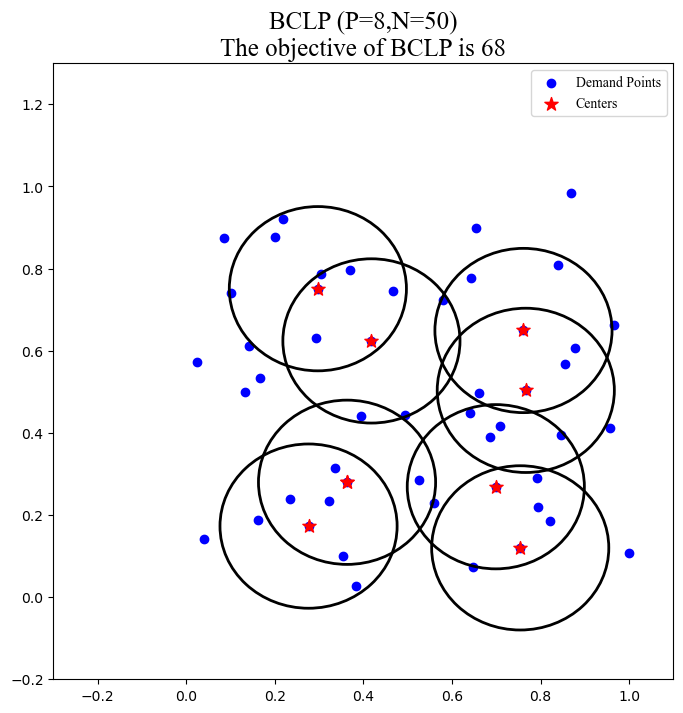

In [7]:
fig = plt.figure(figsize=(8, 8))
name = 'BCLP (P=' + str(num_facilities) + ',N=' + str(num_points) + ')\nThe objective of BCLP is ' + str(round(obj))
plt.title(name, font = 'Times New Roman', fontsize = 18)
display_points_with_bclp(points_np, centers, radius)
plt.legend(loc='best', prop='Times New Roman', fontsize = 18) 
plt.show()

### Case2. Solving BCLP (Backup Covering Location Problems) with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [8]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

We select Xicheng District of Beijing the study area and read partial poi points in Xicheng District.

In [9]:
%%time
region=gpd.read_file("../data/shenzhen/坪山区.shp")
region.head(2)

CPU times: total: 31.2 ms
Wall time: 21.4 ms


,id,name,site,Shape_Leng,Shape_Area,geometry
0,440310,坪山区,www.poi86.com,0.742967,0.014409,"POLYGON ((114.35085 22.76847, 114.35104 22.767..."


Partial POI data in Changping district

In [10]:
%%time
poi = gpd.read_file("../data/shenzhen/坪山区AED.shp")
poi.shape[0]

CPU times: total: 15.6 ms
Wall time: 9 ms


494

In [11]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

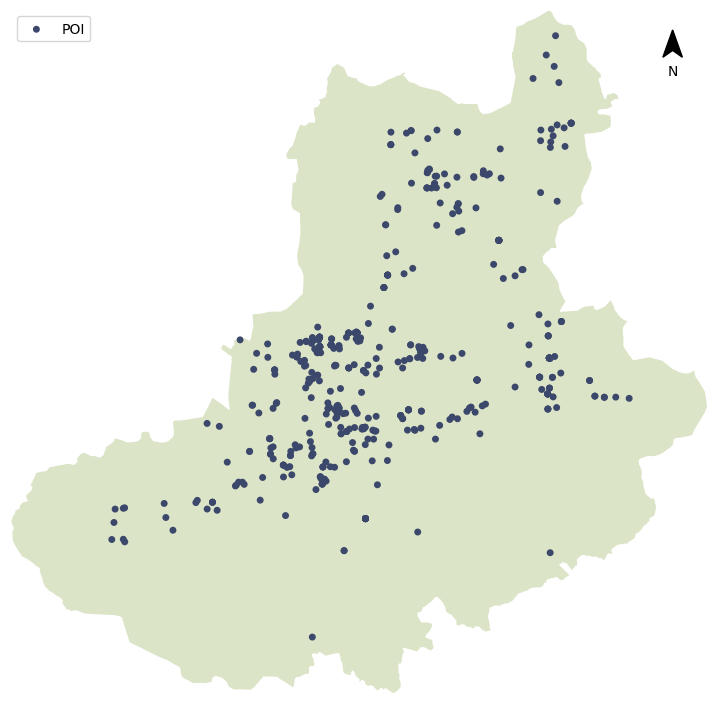

In [12]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="#DBE4C6",
                   figsize=(9, 9))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color= '#3C486B',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)

#### Solving BCLP

In [13]:
data = poi[['lon', 'lat']]
num_points = poi.shape[0]
#num_located = int(poi.shape[0]/5)
num_located = 50
points = [(data['lon'][i], data['lat'][i]) for i in range(num_points)]
points_np = np.array(points)
setup_cost = np.random.randint(1, 2, size=num_points)
radius = 0.005

In [14]:
num_located

50

In [15]:
centers, cover_twice, obj = BCLP(num_located=num_located,
                                 num_points=num_points,
                                 points=points_np,
                                 radius=radius,
                                 setup_cost=setup_cost,
                                 solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected points = [1, 14, 15, 33, 38, 58, 66, 77, 84, 93, 110, 111, 117, 132, 134, 137, 157, 165, 193, 208, 239, 242, 243, 272, 281, 284, 301, 302, 321, 322, 329, 333, 349, 354, 367, 372, 375, 380, 387, 419, 420, 426, 429, 443, 455, 456, 461, 464, 483, 484]
Covered twice points = [10, 11, 12, 13, 14, 15, 16, 31, 32, 33, 35, 38, 39, 40, 41, 42, 44, 45, 46, 49, 50, 51, 54, 58, 59, 62, 67, 68, 69, 70, 71, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 198, 199, 201, 202, 203, 204, 205, 207,

prepare the LineString and center Points to plot the solution

In [16]:
center_points = poi.iloc[centers]

In [17]:
from shapely.geometry.polygon import Polygon
def gen_circile_gdf(centers, radius, num_segments = 100):
    crs = 'EPSG:2381'
    Circles = gpd.GeoDataFrame(columns=['id', 'geometry'], crs=crs)
    k=0
    for center in centers:
        angles = [i * (360 / num_segments) for i in range(num_segments)]
        points = [(center[0] + radius * np.cos(np.radians(a)), center[1] + radius * np.sin(np.radians(a))) for a in angles]
        circle = Polygon(points)
        Circles.loc[k] = [k+1, circle]
        k = k+1
    return Circles

In [18]:
coverage = gen_circile_gdf(points_np[centers], radius)

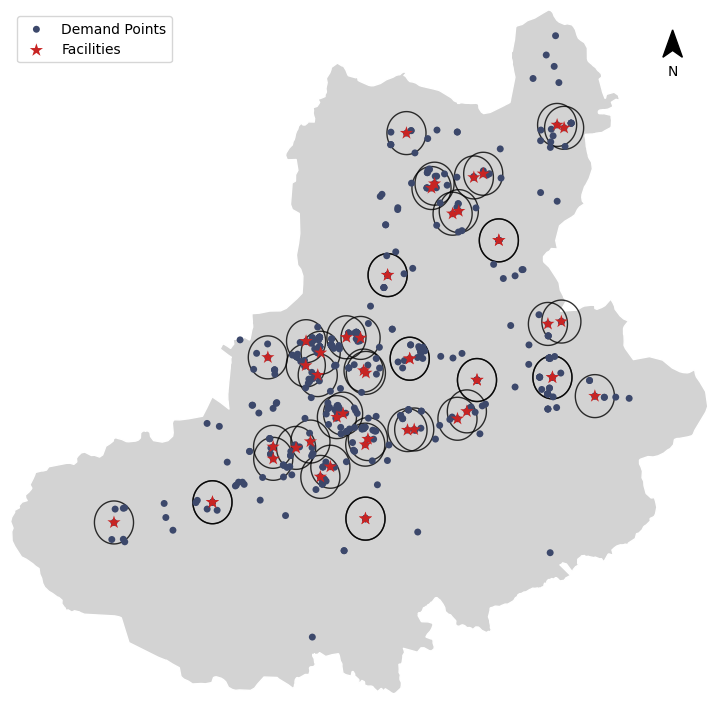

In [19]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="lightgray",
                   figsize=(9, 9))
gplt.polyplot(coverage,
              projection=gcrs.AlbersEqualArea(),
#               projection='equal_area',
              edgecolor="black", 
              alpha=0.8,
              zorder=1,
              ax=ax)

gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='#3C486B',
               alpha=1,
               linewidth=0,
               label='Demand Points',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points, 
               extent=region.total_bounds,
               s=10,
               color='#C82423',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Facilities',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='upper left')


In [20]:
import math

def render_scale_bar(ax, x=0.05, y=0.05, length_frac=0.15, segments=2,
                     color='black', unit='m', fontsize=9, approx_lat=None, 
                     fixed_max_distance=4000):
    """
    在经纬度坐标图上绘制“真实长度”的比例尺。
    - 刻度固定为 0, 2000, 4000（当 segments=2 且 fixed_max_distance=4000 时）
    - 根据当前坐标轴的经度跨度与给定纬度，换算 4000 m 对应的经度差
    - 再把该经度差换算为 Axes 坐标系中的宽度来绘制
    """
    try:
        # 1) 计算该纬度下每1°经度对应的米数
        if approx_lat is None:
            ylim = ax.get_ylim()
            approx_lat = (float(ylim[0]) + float(ylim[1])) / 2.0
        meters_per_deg_lon = 111320.0 * math.cos(math.radians(float(approx_lat)))
        if meters_per_deg_lon <= 0:
            meters_per_deg_lon = 111320.0  # 回退

        # 2) 目标真实长度（米） -> 经度差（度）
        total_m = float(fixed_max_distance)  # 例如 4000 m
        dlon = total_m / meters_per_deg_lon

        # 3) 将经度差换算成 Axes 分数坐标中的长度
        xlim = ax.get_xlim()
        x_span_deg = float(xlim[1]) - float(xlim[0])
        if x_span_deg <= 0:
            x_span_deg = abs(x_span_deg) if x_span_deg != 0 else 1e-9
        length_frac_true = dlon / x_span_deg

        # 避免过长/过短（非常小地图时）
        length_frac_true = max(min(length_frac_true, 0.6), 0.05)

        # 4) 主线
        ax.plot([x, x + length_frac_true], [y, y], transform=ax.transAxes, color=color, lw=2)

        # 5) 刻度与数字：等分到 segments 段
        for s in range(segments + 1):
            xs = x + length_frac_true * s / segments
            ax.plot([xs, xs], [y - 0.01, y + 0.01], transform=ax.transAxes, color=color, lw=1)
            val = int(total_m * s / segments)
            ax.text(xs, y - 0.035, f"{val}", ha='center', va='top', transform=ax.transAxes, fontsize=fontsize)

        # 6) 单位
        ax.text(x + length_frac_true + 0.03, y - 0.035, unit, ha='left', va='top',
                transform=ax.transAxes, fontsize=fontsize)
    except Exception:
        # 出错则退回到固定长度比例尺（不准确，但保证绘图不报错）
        ax.plot([x, x + length_frac], [y, y], transform=ax.transAxes, color=color, lw=2)
        for s in range(segments + 1):
            xs = x + length_frac * s / segments
            ax.plot([xs, xs], [y - 0.01, y + 0.01], transform=ax.transAxes, color=color, lw=1)
            val = int(fixed_max_distance * s / segments)
            ax.text(xs, y - 0.035, f"{val}", ha='center', va='top', transform=ax.transAxes, fontsize=fontsize)
        ax.text(x + length_frac + 0.03, y - 0.035, unit, ha='left', va='top',
                transform=ax.transAxes, fontsize=fontsize)

In [34]:
# 绘制指北针
def render_north_arrow(ax, x, y, size, ratio = 1):
    # ax： matplotlib的坐标轴对象 绘制指北针
    # x, y： 指北针的左下角坐标
    # size： 指北针的大小
    # ratio： 指北针的比例 默认为1
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2.5, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=22, fontweight='bold')  

In [35]:
import os
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib import patheffects as pe

def plot_result_pretty(ls, opt_sites, radius_m=2000, roads_path="data/HuLaTang/Export_Output_2.shp",
                       demand_gridsize=60, demand_cmap="magma", roads_color="#9e9e9e", roads_alpha=0.35,
                       norm_mode="log", vmin_q=0.10, vmax_q=0.995, gamma=0.6, reduce="sum",
                       overlay_points=True, overlay_points_size=6, overlay_points_alpha=0.28,
                       overlay_hex_grid=False, hex_grid_color="#222222", hex_grid_alpha=0.18, hex_grid_lw=0.25,
                       circle_style="ring", show_heat=True, show_colorbar=False, lang="zh", title=None):
    """
    更美观的选址结果绘图：需求热度（hexbin）+ 道路 + 站点 + 服务圈。

    Args:
        ls (GeoDataFrame): 需求点，包含 POINT_X/POINT_Y 或 X/Y 以及 All_pop（可选）。
        opt_sites (DataFrame): 入选站点行，包含 x/y 列（point_x_1/POINT_X...）。
        radius_m (float): 服务半径（与坐标同单位）。
        roads_path (str): 道路 shp 文件路径。
        demand_gridsize (int): 六边形网格大小。
        demand_cmap (str): 需求热度配色。
        roads_color (str): 道路颜色。
        roads_alpha (float): 道路透明度。
        norm_mode (str): 'log' | 'power' | 'linear'。
        vmin_q, vmax_q (float): 需求分位裁剪，仅用于显示。
        gamma (float): PowerNorm 的 gamma。
        reduce (str): 'sum' 或 'mean' 作为 hexbin 聚合方式。
        overlay_points (bool): 是否叠加需求点散点。
        circle_style (str): 'fill' | 'ring' 服务圈样式。
        show_colorbar (bool): 是否显示色标。
        lang (str): 'zh' 或 'en'，控制标签语言。
        title (str|None): 自定义标题。
    """
    # 语言包
    L = {
        'zh': {
            'road': '道路网络', 'demand': '需求点', 'selected': '新建门店', 'current': '现有门店',
            'title': '选址结果与需求强度', 'subtitle': lambda n, r: f"门店数：{n}  半径：{r} m"
        },
        'en': {
            'road': 'Road network', 'demand': 'Demand points', 'selected': 'Selected facilities', 'current': 'Current sites',
            'title': 'Optimized Facilities with Demand Heat', 'subtitle': lambda n, r: f"Facilities: {n}  Radius: {r} m"
        }
    }
    LL = L.get(lang, L['zh'])

    # 1) 需求列与坐标列
    pop_col = None
    if 'speed_pct_freeflow_rev' in ls.columns:
        pop_col = 'speed_pct_freeflow_rev'
    else:
        for c in ls.columns:
            if str(c).lower() == 'all_pop':
                pop_col = c
                break

    # 支持多种坐标列命名：X/Y、POINT_X/POINT_Y、x/y、lon/lat、lng/latitude 等
    def pick_xy_from_ls(df):
        lower_to_orig = {str(c).lower(): c for c in df.columns}
        def choose(candidates):
            for name in candidates:
                if name in lower_to_orig:
                    return lower_to_orig[name]
            return None
        x_col = choose(['x', 'point_x', 'pointx', 'lon', 'lng', 'longitude', 'point_x_1', 'point_x'])
        y_col = choose(['y', 'point_y', 'pointy', 'lat', 'latitude', 'point_y_1', 'point_y'])
        if x_col is None and 'POINT_X' in df.columns:
            x_col = 'POINT_X'
        if y_col is None and 'POINT_Y' in df.columns:
            y_col = 'POINT_Y'
        if x_col is None and 'X' in df.columns:
            x_col = 'X'
        if y_col is None and 'Y' in df.columns:
            y_col = 'Y'
        if x_col is None or y_col is None:
            raise ValueError("ls must contain coordinate columns (X/Y, POINT_X/POINT_Y, or lon/lat).")
        return x_col, y_col

    dx, dy = pick_xy_from_ls(ls)

    # 2) 站点坐标列
    def pick_xy_cols(df):
        x_col = None
        y_col = None
        # 支持更多坐标命名：x/y、X/Y、POINT_X/POINT_Y、lon/lat、lng/latitude
        lower_to_orig = {str(c).lower(): c for c in df.columns}
        def choose(candidates):
            for name in candidates:
                if name in lower_to_orig:
                    return lower_to_orig[name]
            return None
        x_col = choose(['x', 'point_x', 'pointx', 'lon', 'lng', 'longitude', 'point_x_1', 'point_x'])
        y_col = choose(['y', 'point_y', 'pointy', 'lat', 'latitude', 'point_y_1', 'point_y'])
        if x_col is None and 'POINT_X' in df.columns: x_col = 'POINT_X'
        if y_col is None and 'POINT_Y' in df.columns: y_col = 'POINT_Y'
        if x_col is None and 'X' in df.columns: x_col = 'X'
        if y_col is None and 'Y' in df.columns: y_col = 'Y'
        if x_col is None or y_col is None:
            raise ValueError('opt_sites must contain coordinate columns (X/Y, POINT_X/POINT_Y, or lon/lat).')
        return x_col, y_col

    x_col, y_col = pick_xy_cols(opt_sites)

    # 3) 画布
    fig, ax = plt.subplots(figsize=(20, 16))

    # 4) 道路底图
    if isinstance(roads_path, str) and os.path.exists(roads_path):
        try:
            roads = gpd.read_file(roads_path)
            try:
                roads.plot(ax=ax, color=roads_color, linewidth=0.4, alpha=roads_alpha, zorder=1, label=LL['road'])
            except Exception:
                pass
        except Exception:
            pass

    # 5) 需求热度（hexbin），分位裁剪 + 归一
    try:
        if show_heat:
            values = ls[pop_col].to_numpy() if pop_col is not None else None
            if values is not None:
                vmin = float(np.quantile(values, vmin_q)) if 0 <= vmin_q < 1 else None
                vmax = float(np.quantile(values, vmax_q)) if 0 < vmax_q <= 1 else None
                if vmin is not None and vmax is not None and vmax > vmin:
                    values_clipped = np.clip(values, vmin, vmax)
                else:
                    values_clipped = values
                if norm_mode == 'log':
                    from matplotlib.colors import LogNorm
                    norm = LogNorm(vmin=max(values_clipped.min(), 1e-6), vmax=values_clipped.max())
                elif norm_mode == 'power':
                    from matplotlib.colors import PowerNorm
                    norm = PowerNorm(gamma=gamma, vmin=values_clipped.min(), vmax=values_clipped.max())
                else:
                    norm = None
            else:
                values_clipped = None
                norm = None

            reducer = np.sum if reduce == 'sum' else np.mean
            hb = ax.hexbin(ls[dx].to_numpy(), ls[dy].to_numpy(),
                           C=values_clipped,
                           reduce_C_function=reducer if values_clipped is not None else None,
                           gridsize=demand_gridsize, cmap=demand_cmap, bins=None, mincnt=1,
                           linewidths=0, alpha=0.92, zorder=5, norm=norm)
            try:
                hb.set_edgecolor('face')
            except Exception:
                pass
            if show_colorbar and values is not None:
                cbar = fig.colorbar(hb, ax=ax, shrink=0.8)
                cbar.ax.tick_params(labelsize=10)
    except Exception:
        if show_heat:
            sc = ax.scatter(ls[dx], ls[dy], c=ls[pop_col] if pop_col is not None else '#9ecae1',
                            s=8, cmap=demand_cmap, edgecolors='none', zorder=5)
            if show_colorbar and pop_col is not None:
                fig.colorbar(sc, ax=ax, shrink=0.8)

    # 6) 可选叠加：需求点
    if overlay_points:
        try:
            ax.scatter(ls[dx], ls[dy], s=overlay_points_size, c='#2c3e50', alpha=overlay_points_alpha,
                       linewidths=0, zorder=6, label=LL['demand'])
        except Exception:
            pass

    # 7) 门店与服务圈
    legend_flag = {'selected': False, 'current': False}
    for _, row in opt_sites.iterrows():
        cx = float(row[x_col])
        cy = float(row[y_col])
        is_current = ('current' in opt_sites.columns and bool(row['current']) is True)
        if is_current:
            coll = ax.scatter(cx, cy, s=46, marker='o', facecolor='white', edgecolor='red', linewidths=1.2,
                              zorder=10, label=LL['current'] if not legend_flag['current'] else None)
            try:
                coll.set_path_effects([pe.withStroke(linewidth=2.2, foreground='white')])
            except Exception:
                pass
            legend_flag['current'] = True
            circ_kwargs = dict(facecolor='none', edgecolor='red', lw=1.0, alpha=0.9, zorder=9)
            if circle_style == 'fill':
                circ_kwargs.update(facecolor='none')
            ax.add_artist(plt.Circle((cx, cy), radius_m, **circ_kwargs))
        else:
            coll = ax.scatter(cx, cy, s=52, marker='o', facecolor='#FF8C42', edgecolor='white', linewidths=0.8,
                              zorder=11, label=LL['selected'] if not legend_flag['selected'] else None)
            try:
                coll.set_path_effects([pe.withStroke(linewidth=2.0, foreground='white')])
            except Exception:
                pass
            legend_flag['selected'] = True
            if circle_style == 'fill':
                circ = plt.Circle((cx, cy), radius_m, facecolor='#FF8C42', edgecolor='#FF8C42', lw=0.6, alpha=0.12, zorder=8)
            else:
                circ = plt.Circle((cx, cy), radius_m, facecolor='none', edgecolor='#FF8C42', lw=1.2, ls='--', alpha=0.85, zorder=9)
            ax.add_artist(circ)

    # 8) 外观
    ax.axis('scaled')
    ax.tick_params(axis='both', left=False, top=False, right=False,
                   bottom=False, labelleft=False, labeltop=False,
                   labelright=False, labelbottom=False)
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.0)
        spine.set_edgecolor('#333333')
    ax.margins(x=0.02, y=0.02)

    ttl = title if title is not None else LL['title']
    ax.set_title(ttl + "\n" + LL['subtitle'](len(opt_sites), int(radius_m)), fontsize=18, pad=12)
    try:
        #render_scale_bar(ax=ax, x=0.05, y=0.05)
        #render_scale_bar(ax, x=0.05, y=0.95, length_frac=0.25, segments=2,
                 #color='black', unit='m', fontsize=9, approx_lat=approx_lat, 
                 #fixed_max_distance=4000)
        render_north_arrow(ax=ax, x=0.95, y=0.95, size=0.03, ratio=0.7)
    except Exception:
        pass

    # 9) 图例（统一“Selected facilities / Demand points”大小）
    legend_marker_size = 22         # 放大图例里圆点
    legend_fontsize = 14            # 放大字体
    legend_frame_lw = 2.0           # 框线粗细 
    legend_frame_ec = '#333333'     # 框线颜色
    legend_borderpad = 0.9          # 框与内容的内边距
    legend_labelspacing = 0.8       # 行距
    legend_handlelength = 1.6       # 句柄长度
    legend_handletextpad = 0.8      # 句柄与文字间距
    has_current = ('current' in opt_sites.columns and bool(np.any(opt_sites['current'].astype(bool))))
    custom_handles = []
    # road
    #custom_handles.append(Line2D([0], [0], color=roads_color, lw=1.0, alpha=0.6, label=LL['road']))
    # current (optional)
    if has_current:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='white',
                                    markeredgecolor='red', markeredgewidth=1.2, markersize=legend_marker_size,
                                     label=LL['current']))
    # demand
    if overlay_points:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='#2c3e50',
                                     markersize=legend_marker_size, alpha=overlay_points_alpha, label=LL['demand']))
    # selected
    if len(opt_sites) > 0:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='#FF8C42',
                                     markeredgecolor='white', markeredgewidth=0.8, markersize=legend_marker_size,
                                     label=LL['selected']))
    leg = ax.legend(handles=custom_handles, loc='lower right', markerscale=1.0, frameon=True, framealpha=0.85, fontsize=20)

    # 强化框线 
    leg.get_frame().set_linewidth(legend_frame_lw)
    leg.get_frame().set_edgecolor(legend_frame_ec)
    fig.tight_layout()
    return ax


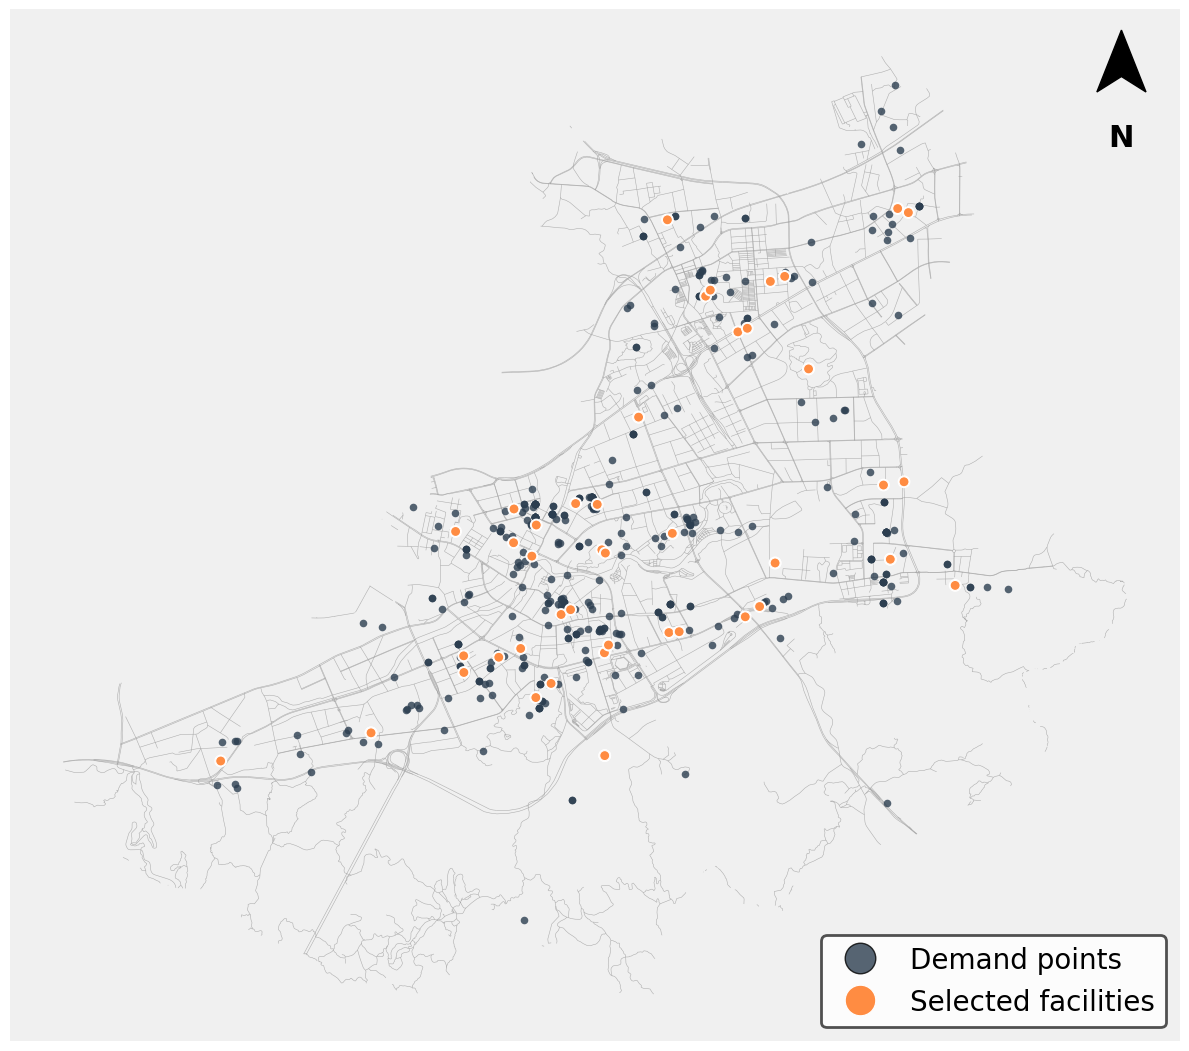

In [36]:
# Demo call for pretty plot (Gurobi)
#try:
#    opt_sites = cand_df.loc[selected_sites]
#except Exception:
#    opt_sites = cand_df.iloc[:30]
ls = poi[['lon','lat']].copy()

# 估计中心纬度用于换算（经纬度数据时）
approx_lat = float(ls['lat'].mean()) if 'lat' in ls.columns else float(ls['Y'].mean())

ax = plot_result_pretty(
    #ls_hlt,
    ls,
    center_points,
    radius_m=550,
    roads_path="D:\Academic\Task123_HiSpot\hispot-main\data\shenzhen\坪山区路网.shp",
    demand_gridsize=80,
    demand_cmap="inferno",
    roads_color="#9e9e9e", roads_alpha=0.8,
    overlay_points_size=30, overlay_points_alpha=0.8,
    norm_mode="log",
    vmin_q=0.12,
    vmax_q=0.995,
    reduce="sum",
    circle_style="ring",
    show_heat=False,
    #show_heat=True,
    lang="en",
    title="BCLP-Optimized Facilities"
)
# 16:9 canvas (for PPT) and save HD image
fig = ax.figure
fig.set_size_inches(20, 11.25)
fig.tight_layout()
ax.set_title('')
for s in ax.spines.values(): s.set_visible(False)
ax.set_xticks([]); ax.set_yticks([])
#ax.set_title(f"BCLP-Optimized Facilities\nNumber of Facilities: {len(center_points)}", pad=10, color="#D2691E")
ax.set_facecolor("#F0F0F0")      # 改坐标区底色
#ax.figure.patch.set_facecolor("#696969")  # 可选：改整张图画布底色
fig.savefig("BCLP-pingshan.png", dpi=300, bbox_inches="tight")
plt.show()
